In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


In [ ]:
# Convert image to tensor
transform = transforms.ToTensor()

# Automatically downloads and prepares MNIST
train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Load data in batches
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1000)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 480kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 3.93MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 2.91MB/s]


In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_size=784, hidden_size=128, output_size=10):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = x.view(-1, 784)  # Flatten the 28x28 image to a 784-dim vector
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x


In [ ]:
def train(model, loader, criterion, optimizer):
    model.train()
    total_loss = 0
    correct = 0
    for images, labels in loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        correct += (outputs.argmax(1) == labels).sum().item()

    avg_loss = total_loss / len(loader)
    accuracy = correct / len(loader.dataset)
    return avg_loss, accuracy

def evaluate(model, loader, criterion):
    model.eval()
    total_loss = 0
    correct = 0
    with torch.no_grad():
        for images, labels in loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()

    avg_loss = total_loss / len(loader)
    accuracy = correct / len(loader.dataset)
    return avg_loss, accuracy


In [ ]:
# Create the model
model = SimpleNN()

# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = optim.SGD(model.parameters(), lr=0.01)

# For tracking performance
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

# Train the model for 10 epochs
for epoch in range(10):
    train_loss, train_acc = train(model, train_loader, criterion, optimizer)
    val_loss, val_acc = evaluate(model, test_loader, criterion)

    train_losses.append(train_loss)
    train_accuracies.append(train_acc)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")


Epoch 1: Train Loss = 1.2358, Train Acc = 0.7408, Val Loss = 0.5763, Val Acc = 0.8696
Epoch 2: Train Loss = 0.4904, Train Acc = 0.8759, Val Loss = 0.4019, Val Acc = 0.8939
Epoch 3: Train Loss = 0.3930, Train Acc = 0.8929, Val Loss = 0.3497, Val Acc = 0.9032
Epoch 4: Train Loss = 0.3533, Train Acc = 0.9012, Val Loss = 0.3228, Val Acc = 0.9097
Epoch 5: Train Loss = 0.3294, Train Acc = 0.9069, Val Loss = 0.3054, Val Acc = 0.9145
Epoch 6: Train Loss = 0.3118, Train Acc = 0.9117, Val Loss = 0.2922, Val Acc = 0.9188
Epoch 7: Train Loss = 0.2978, Train Acc = 0.9153, Val Loss = 0.2803, Val Acc = 0.9216
Epoch 8: Train Loss = 0.2853, Train Acc = 0.9191, Val Loss = 0.2709, Val Acc = 0.9235
Epoch 9: Train Loss = 0.2747, Train Acc = 0.9224, Val Loss = 0.2623, Val Acc = 0.9277
Epoch 10: Train Loss = 0.2650, Train Acc = 0.9251, Val Loss = 0.2527, Val Acc = 0.9285


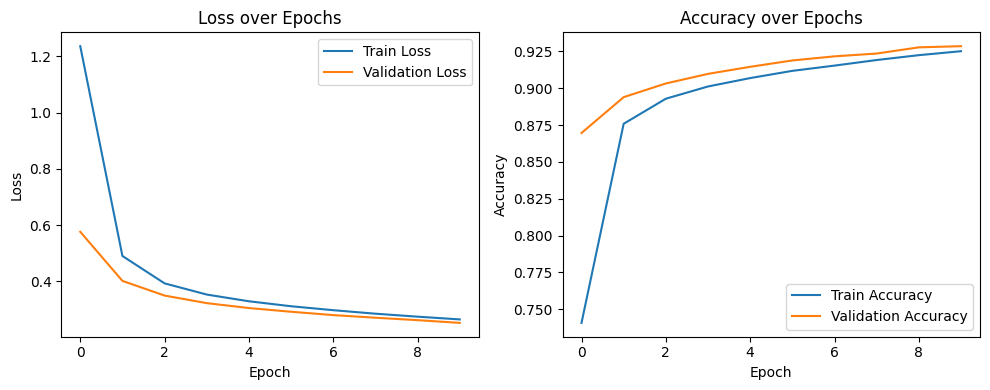

In [ ]:
# Plotting Loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.001)  # or 0.1

In [ ]:
# Model with lower learning rate
model_low_lr = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer_low_lr = optim.SGD(model_low_lr.parameters(), lr=0.001)

train_losses_low, val_losses_low = [], []
train_accs_low, val_accs_low = [], []

for epoch in range(10):
    train_loss, train_acc = train(model_low_lr, train_loader, criterion, optimizer_low_lr)
    val_loss, val_acc = evaluate(model_low_lr, test_loader, criterion)

    train_losses_low.append(train_loss)
    val_losses_low.append(val_loss)
    train_accs_low.append(train_acc)
    val_accs_low.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")


Epoch 1: Train Loss = 2.2296, Train Acc = 0.3238, Val Loss = 2.1450, Val Acc = 0.5261
Epoch 2: Train Loss = 2.0419, Train Acc = 0.6054, Val Loss = 1.9169, Val Acc = 0.6640
Epoch 3: Train Loss = 1.7806, Train Acc = 0.6892, Val Loss = 1.6191, Val Acc = 0.7322
Epoch 4: Train Loss = 1.4796, Train Acc = 0.7419, Val Loss = 1.3176, Val Acc = 0.7684
Epoch 5: Train Loss = 1.2094, Train Acc = 0.7742, Val Loss = 1.0770, Val Acc = 0.8013
Epoch 6: Train Loss = 1.0078, Train Acc = 0.8035, Val Loss = 0.9078, Val Acc = 0.8241
Epoch 7: Train Loss = 0.8675, Train Acc = 0.8229, Val Loss = 0.7908, Val Acc = 0.8375
Epoch 8: Train Loss = 0.7684, Train Acc = 0.8368, Val Loss = 0.7068, Val Acc = 0.8489
Epoch 9: Train Loss = 0.6964, Train Acc = 0.8462, Val Loss = 0.6446, Val Acc = 0.8583
Epoch 10: Train Loss = 0.6417, Train Acc = 0.8540, Val Loss = 0.5969, Val Acc = 0.8648


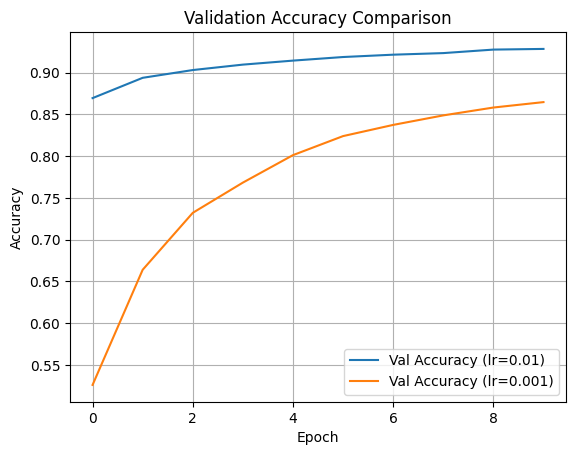

In [ ]:
plt.plot(val_accuracies, label='Val Accuracy (lr=0.01)')
plt.plot(val_accs_low, label='Val Accuracy (lr=0.001)')
plt.title('Validation Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Model with higher learning rate
model_high_lr = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer_high_lr = optim.SGD(model_high_lr.parameters(), lr=0.1)

train_losses_high, val_losses_high = [], []
train_accs_high, val_accs_high = [], []

for epoch in range(10):
    train_loss, train_acc = train(model_high_lr, train_loader, criterion, optimizer_high_lr)
    val_loss, val_acc = evaluate(model_high_lr, test_loader, criterion)

    train_losses_high.append(train_loss)
    val_losses_high.append(val_loss)
    train_accs_high.append(train_acc)
    val_accs_high.append(val_acc)

    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Train Acc = {train_acc:.4f}, Val Loss = {val_loss:.4f}, Val Acc = {val_acc:.4f}")


Epoch 1: Train Loss = 0.4449, Train Acc = 0.8809, Val Loss = 0.2605, Val Acc = 0.9276
Epoch 2: Train Loss = 0.2296, Train Acc = 0.9343, Val Loss = 0.1956, Val Acc = 0.9438
Epoch 3: Train Loss = 0.1729, Train Acc = 0.9505, Val Loss = 0.1557, Val Acc = 0.9541
Epoch 4: Train Loss = 0.1384, Train Acc = 0.9607, Val Loss = 0.1261, Val Acc = 0.9622
Epoch 5: Train Loss = 0.1148, Train Acc = 0.9675, Val Loss = 0.1157, Val Acc = 0.9656
Epoch 6: Train Loss = 0.0980, Train Acc = 0.9720, Val Loss = 0.1026, Val Acc = 0.9683
Epoch 7: Train Loss = 0.0858, Train Acc = 0.9758, Val Loss = 0.0979, Val Acc = 0.9703
Epoch 8: Train Loss = 0.0761, Train Acc = 0.9786, Val Loss = 0.0915, Val Acc = 0.9718
Epoch 9: Train Loss = 0.0685, Train Acc = 0.9802, Val Loss = 0.0835, Val Acc = 0.9740
Epoch 10: Train Loss = 0.0620, Train Acc = 0.9825, Val Loss = 0.0819, Val Acc = 0.9738


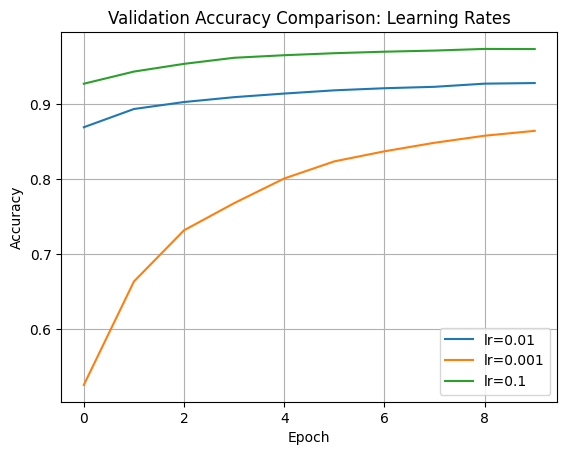

In [ ]:
plt.plot(val_accuracies, label='lr=0.01')
plt.plot(val_accs_low, label='lr=0.001')
plt.plot(val_accs_high, label='lr=0.1')
plt.title('Validation Accuracy Comparison: Learning Rates')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Reload data with batch size = 32
train_loader_32 = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader_32 = DataLoader(test_data, batch_size=1000)

# Train with batch size 32 and lr = 0.01 for consistency
model_bs_32 = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer_bs_32 = optim.SGD(model_bs_32.parameters(), lr=0.01)

val_accs_bs_32 = []

for epoch in range(10):
    train(model_bs_32, train_loader_32, criterion, optimizer_bs_32)
    _, val_acc = evaluate(model_bs_32, test_loader_32, criterion)
    val_accs_bs_32.append(val_acc)
    print(f"Epoch {epoch+1}: Val Accuracy = {val_acc:.4f}")


Epoch 1: Val Accuracy = 0.8920
Epoch 2: Val Accuracy = 0.9099
Epoch 3: Val Accuracy = 0.9200
Epoch 4: Val Accuracy = 0.9239
Epoch 5: Val Accuracy = 0.9313
Epoch 6: Val Accuracy = 0.9353
Epoch 7: Val Accuracy = 0.9382
Epoch 8: Val Accuracy = 0.9412
Epoch 9: Val Accuracy = 0.9429
Epoch 10: Val Accuracy = 0.9471


In [ ]:
# Reload data with batch size = 128
train_loader_128 = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader_128 = DataLoader(test_data, batch_size=1000)

# Train with batch size 128 and lr = 0.01
model_bs_128 = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer_bs_128 = optim.SGD(model_bs_128.parameters(), lr=0.01)

val_accs_bs_128 = []

for epoch in range(10):
    train(model_bs_128, train_loader_128, criterion, optimizer_bs_128)
    _, val_acc = evaluate(model_bs_128, test_loader_128, criterion)
    val_accs_bs_128.append(val_acc)
    print(f"Epoch {epoch+1}: Val Accuracy = {val_acc:.4f}")


Epoch 1: Val Accuracy = 0.8108
Epoch 2: Val Accuracy = 0.8654
Epoch 3: Val Accuracy = 0.8850
Epoch 4: Val Accuracy = 0.8939
Epoch 5: Val Accuracy = 0.8990
Epoch 6: Val Accuracy = 0.9028
Epoch 7: Val Accuracy = 0.9064
Epoch 8: Val Accuracy = 0.9093
Epoch 9: Val Accuracy = 0.9129
Epoch 10: Val Accuracy = 0.9138


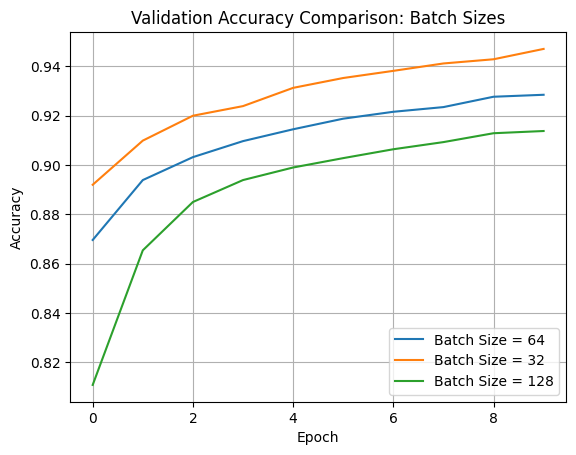

In [ ]:
plt.plot(val_accuracies, label='Batch Size = 64')
plt.plot(val_accs_bs_32, label='Batch Size = 32')
plt.plot(val_accs_bs_128, label='Batch Size = 128')
plt.title('Validation Accuracy Comparison: Batch Sizes')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
class SmallHiddenNN(nn.Module):
    def __init__(self):
        super(SmallHiddenNN, self).__init__()
        self.fc1 = nn.Linear(784, 64)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Train with batch size = 64 and lr = 0.01
model_small = SmallHiddenNN()
criterion = nn.CrossEntropyLoss()
optimizer_small = optim.SGD(model_small.parameters(), lr=0.01)

val_accs_small = []

for epoch in range(10):
    train(model_small, train_loader, criterion, optimizer_small)
    _, val_acc = evaluate(model_small, test_loader, criterion)
    val_accs_small.append(val_acc)
    print(f"Epoch {epoch+1}: Val Accuracy = {val_acc:.4f}")


Epoch 1: Val Accuracy = 0.8649
Epoch 2: Val Accuracy = 0.8912
Epoch 3: Val Accuracy = 0.9016
Epoch 4: Val Accuracy = 0.9088
Epoch 5: Val Accuracy = 0.9144
Epoch 6: Val Accuracy = 0.9180
Epoch 7: Val Accuracy = 0.9199
Epoch 8: Val Accuracy = 0.9229
Epoch 9: Val Accuracy = 0.9249
Epoch 10: Val Accuracy = 0.9261


In [ ]:
class LargeHiddenNN(nn.Module):
    def __init__(self):
        super(LargeHiddenNN, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 784)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Train with batch size = 64 and lr = 0.01
model_large = LargeHiddenNN()
criterion = nn.CrossEntropyLoss()
optimizer_large = optim.SGD(model_large.parameters(), lr=0.01)

val_accs_large = []

for epoch in range(10):
    train(model_large, train_loader, criterion, optimizer_large)
    _, val_acc = evaluate(model_large, test_loader, criterion)
    val_accs_large.append(val_acc)
    print(f"Epoch {epoch+1}: Val Accuracy = {val_acc:.4f}")


Epoch 1: Val Accuracy = 0.8666
Epoch 2: Val Accuracy = 0.8937
Epoch 3: Val Accuracy = 0.9034
Epoch 4: Val Accuracy = 0.9107
Epoch 5: Val Accuracy = 0.9157
Epoch 6: Val Accuracy = 0.9198
Epoch 7: Val Accuracy = 0.9239
Epoch 8: Val Accuracy = 0.9260
Epoch 9: Val Accuracy = 0.9291
Epoch 10: Val Accuracy = 0.9305


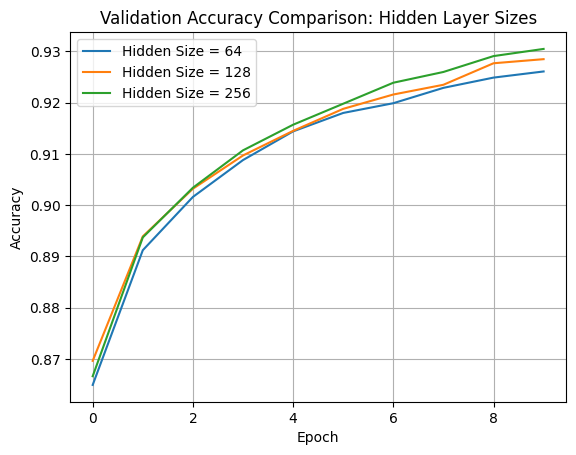

In [ ]:
plt.plot(val_accs_small, label='Hidden Size = 64')
plt.plot(val_accuracies, label='Hidden Size = 128')
plt.plot(val_accs_large, label='Hidden Size = 256')
plt.title('Validation Accuracy Comparison: Hidden Layer Sizes')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
def backtracking_line_search_step(model, loss_fn, x, y, alpha=1.0, beta=0.8, c=0.5):
    model.zero_grad()
    outputs = model(x)
    loss = loss_fn(outputs, y)
    loss.backward()

    # Store original parameters and gradients
    grads = []
    for param in model.parameters():
        grads.append(param.grad.clone())

    # Initial loss and gradient norm
    initial_loss = loss.item()
    grad_norm_squared = sum([(g ** 2).sum().item() for g in grads])

    # Try different alpha until condition is met
    while True:
        # Temporarily update weights
        with torch.no_grad():
            for param, grad in zip(model.parameters(), grads):
                param -= alpha * grad

        # Calculate new loss
        outputs = model(x)
        new_loss = loss_fn(outputs, y).item()

        # Check Armijo condition
        if new_loss <= initial_loss - c * alpha * grad_norm_squared:
            break
        else:
            # Revert weights and reduce alpha
            with torch.no_grad():
                for param, grad in zip(model.parameters(), grads):
                    param += alpha * grad
            alpha *= beta

    # Final update with best alpha
    with torch.no_grad():
        for param, grad in zip(model.parameters(), grads):
            param -= alpha * grad

    return new_loss


In [ ]:
model_bls = SimpleNN()
criterion = nn.CrossEntropyLoss()
val_accs_bls = []

for epoch in range(10):
    model_bls.train()
    for images, labels in train_loader:
        backtracking_line_search_step(model_bls, criterion, images, labels)

    _, val_acc = evaluate(model_bls, test_loader, criterion)
    val_accs_bls.append(val_acc)
    print(f"Epoch {epoch+1}: Val Accuracy = {val_acc:.4f}")


Epoch 1: Val Accuracy = 0.9516
Epoch 2: Val Accuracy = 0.9667
Epoch 3: Val Accuracy = 0.9501
Epoch 4: Val Accuracy = 0.9705
Epoch 5: Val Accuracy = 0.9750
Epoch 6: Val Accuracy = 0.9753
Epoch 7: Val Accuracy = 0.9781
Epoch 8: Val Accuracy = 0.9800
Epoch 9: Val Accuracy = 0.9786
Epoch 10: Val Accuracy = 0.9791


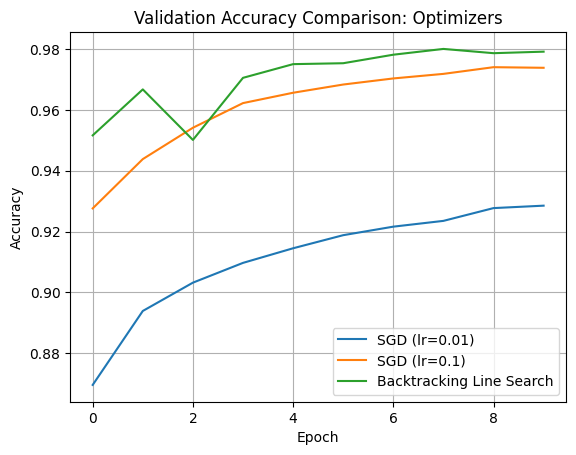

In [ ]:
plt.plot(val_accuracies, label='SGD (lr=0.01)')
plt.plot(val_accs_high, label='SGD (lr=0.1)')
plt.plot(val_accs_bls, label='Backtracking Line Search')
plt.title('Validation Accuracy Comparison: Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
